<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/DataScience_07_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7回講義　回帰分析
### 回帰分析
 + 線形回帰モデル  
 + リッジ回帰  
 + ラッソ回帰  
 + エラスティックネット


## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [ ]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [1]:
#google driveに接続
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       iris.csv
'3(00001).txt'	 breast-cancer-wisconsin.csv   titanic_train.csv
'3(00002).txt'	 example.xlsx		       wine.csv
'3(00003).txt'	 imports-85.csv


# 回帰分析

## 線形回帰モデル
自動車価格データを使った線形回帰モデル（重回帰解析）

### データの内容確認

In [22]:
import pandas as pd
import numpy as np

#ライブラリpandasを使ったcsvデータの読み込み,sepで区切り記号を設定
auto_df = pd.read_csv("/content/drive/MyDrive/DataScience/imports-85.csv", sep=",", header=None)
#最初の五行だけ表示
auto_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [23]:
# 内容確認
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object 
 20  20      205 non-null    float64
 21  21      205 non-null    object 
 22  22

In [24]:
auto_df.columns = ['symboling', 'normalized-losses', 'make', 'fule-type', 'aspiration', 'num-of=doors',
               'body-style', 'drive-weels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
               'curb-weight', 'engin-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
               'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

auto_df.head()

,symboling,normalized-losses,make,fule-type,aspiration,num-of=doors,body-style,drive-weels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 目的変数と説明変数

In [25]:
auto_df = auto_df[['width', 'height', 'horsepower', 'price']]
auto_df

,width,height,horsepower,price
0,64.1,48.8,111,13495
1,64.1,48.8,111,16500
2,65.5,52.4,154,16500
3,66.2,54.3,102,13950
4,66.4,54.3,115,17450
...,...,...,...,...
200,68.9,55.5,114,16845
201,68.8,55.5,160,19045
202,68.9,55.5,134,21485
203,68.9,55.5,106,22470


### データ前処理（欠損データの削除）

In [26]:
# 不適切なデータ（？）を欠損値に置換
auto_df = auto_df.replace('?', np.nan).dropna()

#データ形式の確認
auto_df.shape

(199, 4)

In [27]:
# 型の確認
auto_df.dtypes

,0
width,float64
height,float64
horsepower,object
price,object


### オブジェクトデータの数値化

In [28]:
auto_df = auto_df.assign(price=pd.to_numeric(auto_df.price))
auto_df = auto_df.assign(horsepower=pd.to_numeric(auto_df.horsepower))

auto_df.dtypes

,0
width,float64
height,float64
horsepower,int64
price,int64


### 重回帰分析


In [29]:
#自動車価格データに重回帰を適用して決定係数まで計算してみる

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

#説明変数，目的変数の設定
X = auto_df.drop('price', axis=1)
y = auto_df['price']

#テストデータとトレーニングデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= None )

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#線形回帰モデル（重回帰モデル）の生成と学習
lr = linear_model.LinearRegression()
lr.fit(X_train_std,y_train)

# 決定係数を表示
print('決定係数（train):  {:.4f}'.format(lr.score(X_train_std, y_train)))
print('決定係数（test):  {:.4f}'.format(lr.score(X_test_std, y_test)))

# 回帰係数と切片を表示
print('回帰係数\n{}'.format(pd.Series(lr.coef_, index=X.columns)))
print('切片:  {:.3f}'.format(lr.intercept_))

# 予測
y_train_predict = lr.predict(X_train_std)
y_test_predict = lr.predict(X_test_std)

# 学習データ，検証データの最小２乗誤差を表示
print('最小２乗誤差（train）:  {:.3f}'.format(mean_squared_error(y_train, y_train_predict)))
print('最小２乗誤差（test）:   {:.3f}'.format(mean_squared_error(y_test, y_test_predict)))

決定係数（train):  0.7705
決定係数（test):  0.7451
回帰係数
width         2588.153999
height         791.082845
horsepower    5281.772627
dtype: float64
切片:  13531.540
最小２乗誤差（train）:  15213042.027
最小２乗誤差（test）:   14240987.815


In [30]:
help(linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speedu

## 演習１．他の説明変数による重回帰分析

In [19]:
# 目的変数 price
# 説明変数を別のもの（例えば，width, length, engine-size, mpg）に変えて score を求める
auto_df = auto_df[['width', 'height', 'horsepower', 'price']]
auto_df['price']









,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
200,16845
201,19045
202,21485
203,22470


/tmp/ipython-input-3706313387.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal( [5, 5], [[8, 1],[2, 2]],  100 )


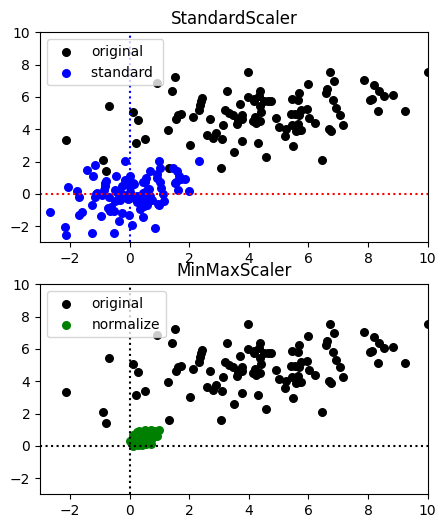

In [31]:
#データの標準化・正規化をやってみるだけのプログラム（元データとの違いを見た目でわかるグラフ付き）
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 元データ
np.random.seed(seed=1)
data = np.random.multivariate_normal( [5, 5], [[8, 1],[2, 2]],  100 )

# 標準化の処理
sc = StandardScaler()
data_std = sc.fit_transform(data)

# 正規化の処理
ms = MinMaxScaler()
data_norm = ms.fit_transform(data)

# 図示化
min_x = min(data[:,0])
max_x = max(data[:,0])

min_y = min(data[:,1])
max_y = max(data[:,1])

plt.figure(figsize=(5, 6))
plt.subplot(2,1,1)
plt.title('StandardScaler')
plt.xlim([-3, 10])
plt.ylim([-3, 10])
plt.scatter(data[:, 0], data[:, 1], c='black', marker='o', s=30, label='original')
plt.scatter(data_std[:, 0], data_std[:, 1], c='blue', marker='o', s=30, label='standard ')
plt.legend(loc='upper left')
plt.vlines(0,ymin=-3, ymax=10, colors='blue', linestyles='dotted')
plt.hlines(0,xmin=-3, xmax=10, colors='red', linestyles='dotted')

plt.subplot(2,1,2)
plt.title('MinMaxScaler')
plt.xlim([-3, 10])
plt.ylim([-3, 10])
plt.scatter(data[:, 0], data[:, 1], c='black', marker='o', s=30, label='original')
plt.scatter(data_norm[:, 0], data_norm[:, 1], c='green', marker='o', s=30, label='normalize')
plt.legend(loc='upper left')
plt.vlines(0,ymin=-3, ymax=10, colors='#000000', linestyles='dotted')
plt.hlines(0,xmin=-3, xmax=10, colors='#000000', linestyles='dotted')

## リッジ回帰

In [32]:
#リッジ回帰
from sklearn.linear_model import Ridge

#リッジ回帰のインスタンス(モデル)生成
ridge = Ridge(random_state=None)
#ridge= Ridge(alpha=15,fit_intercept=True, copy_X=True)

#リッジ回帰の学習（fit）
ridge.fit(X_train_std, y_train)

# 決定係数を表示
print('決定係数（train):  {:.4f}'.format(ridge.score(X_train_std, y_train)))
print('決定係数（test):  {:.4f}'.format(ridge.score(X_test_std, y_test)))

決定係数（train):  0.7705
決定係数（test):  0.7460


In [33]:
# 予測
y_train_predict = ridge.predict(X_train_std)
y_test_predict = ridge.predict(X_test_std)

#各データの推定結果表示
print(y_train_predict)

[22410.96524925  3817.94493435 22326.67721057 10467.75455331
 14061.60724791  6742.29822588  9613.91216777 11386.47632075
 32265.10591769 13705.1704447  16301.31838492 11834.19773997
 11742.11626718 22668.69721169  4904.27321925  6622.43696293
 14061.60724791 24012.57386082 18198.2348766   8408.94913705
 22668.69721169  6141.50711589 11212.65164265 24944.3452081
 12264.07620165 25759.10976154  5027.30724172 17179.07007723
  9446.01313378 10263.85864762  9946.46411722 10045.28521011
 11035.54528671  6059.56319315  7574.15910696 23997.7162921
  6912.72497403 22410.96524925  6941.5941375  15907.10871911
  7325.39818974  5027.30724172 18198.2348766  16014.60834068
  4960.72145546 27293.46308847 21344.18255376 16967.17624751
  4808.02874653 16301.31838492  9898.34188087  9409.81554465
 25318.39246462  5992.97740689  5629.68473147 14496.55448461
 12076.77228336  4837.68743299  5445.28550917 17179.07007723
  5772.00361363  6635.06666784 26283.21309451 12076.77228336
 25318.39246462 11035.5452

In [34]:
print(y_test_predict)

[17233.87192138  5772.00361363  6622.43696293 10410.1887183
 10467.75455331 15743.57340247 15920.30277656  4960.72145546
 13680.20355142  9561.13369753 22211.500407   12610.86868878
 21793.9909205  22017.84495675  4960.72145546  9946.46411722
 10055.48277245  6771.14293635 17611.87768792 13680.20355142
 25065.87731612 11742.11626718 12610.86868878 27293.46308847
 17573.69228418  5027.30724172  6392.49212444 16301.31838492
 32204.64649296  6392.49212444  6059.56319315  9561.13369753
 11683.55285796  8715.1729839  12091.57717358 11386.47632075
 14112.12984001 16301.31838492  5992.97740689 11046.187177
 -1184.68223136  5027.30724172 15743.57340247 17611.87768792
  6622.43696293  6392.49212444 12943.79762007 12973.45630653
  5772.00361363  9997.51550258 16967.17624751 21211.71603891
 25840.11612237 21211.71603891  6742.29822588  6635.06666784
 23059.12085942  8768.6320588  21722.94961778  6704.55715009]


In [35]:
#リッジの変更可能なパラメータなどを確認する
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
 |
 |  Linear least squares with l2 regularization.
 |
 |  Minimizes the objective function::
 |
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Constant that multiplies the L2 term, controlling regularization
 | 

## ラッソ回帰

In [36]:
#アルファはL1ノルムのペナルティの大きさを示しており、アルファが大きいほど正則化（ペナルティ具合）が大きい
from sklearn.linear_model import Lasso

#ラッソ回帰のインスタンス(モデル)生成
lasso = Lasso(alpha = 5, random_state=None)

#ラッソ回帰の学習（fit）
lasso.fit(X_train_std, y_train)

# 決定係数を表示
print('決定係数（train):  {:.4f}'.format(lasso.score(X_train_std, y_train)))
print('決定係数（test):  {:.4f}'.format(lasso.score(X_test_std, y_test)))

決定係数（train):  0.7705
決定係数（test):  0.7452


## 演習２．演習１で用いた説明変数でラッソ回帰を行う

In [ ]:
# ラッソ回帰







In [ ]:
help(Lasso)

## エラスティックネット

In [37]:
from sklearn.linear_model import ElasticNet

#エラスティックネットのインスタンス(モデル)生成
elasticNet = ElasticNet(alpha = 0.2, l1_ratio = 0.2, random_state=None)

#エラスティックネットの学習（fit）
elasticNet.fit(X_train_std, y_train)

# 決定係数を表示
print('決定係数（train):  {:.4f}'.format(elasticNet.score(X_train_std, y_train)))
print('決定係数（test):  {:.4f}'.format(elasticNet.score(X_test_std, y_test)))

決定係数（train):  0.7622
決定係数（test):  0.7517


In [ ]:
help(ElasticNet)